# Extração de CNPJ

### Importações padrão para o projeto

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
import re
import seaborn as sns

### Método para acessar o caminho das imagens do dataset

* Utilize este método para acessar o caminho das imagens do dataset em ordem alfabética.

* Deve ser utilizado para percorrer a quantidade desejada das imagens disponíveis na pasta **notasFiscais**.

* Caso não passe parâmetros, serão retornados todos os caminhos das imagens nesta pasta.

* Para realizar os experimentos utilize o parâmetro quantity com o valor 30, a não ser que esteja muito lento para processar essa quantidade.
    * Caso seja necessário utilizar mais imagens para os experimentos, deixe claro quantos foram usadas e o motivo. 

In [2]:
DATASET_DIR = 'notasfiscais'
DATASET_PATH = '/work/notasfiscais/'

In [3]:
def getImages(quantity=None):
    if quantity is None:
        return sorted([os.path.abspath('..') +'/'+DATASET_DIR+'/' + x for x in os.listdir('../'+DATASET_DIR) if x.endswith('.jpg')])
    else:
        return sorted([os.path.abspath('..') +'/'+DATASET_DIR+'/' + x for x in os.listdir('../'+DATASET_DIR) if x.endswith('.jpg')])[:quantity]

* Exemplo de uso retornando o caminho somente de uma imagem;

In [4]:
print(getImages(1))

['/work/notasfiscais/001.jpg']


### Método para extrair CNPJ da Imagem através do Pytesseract

* Utilize este método para extrair o CNPJ da imagem passada para ele como parâmetro;

* Caso um ou mais CNPJs sejam encontrados será retornado um Array de Strings, onde cada item do array corresponde a um CNPJ identificado;

In [5]:
def extractCNPJ(image):
    CNPJs = []
    
    # Criar regex correspondente ao modelo de CNPJ brasileiro.
    regexCNPJ = re.compile('\d{2}\.\d{3}\.\d{3}\/\d{4}-\d{2}')

    # O Pytesseract utiliza o OCR - Reconhecimento Ótico de Caracteres para extrair os textos da Imagem.
    text = pytesseract.image_to_string(image, lang='por')

    # Percorre o texto por linhas tentando encontrar algum CNPJ válido que case com a Regex.
    for line in iter(text.splitlines()):
        CNPJs += regexCNPJ.findall(line)

    # Caso esteja vazia não foi encontrado nenhum CNPJ.
    return CNPJs

* Exemplo de uso da extração de CNPJ;

In [6]:
# Primeira imagem dos 50 caminhos selecionados do dataset.
print("Imagem: {}".format(getImages(50)[1]))

image = cv2.imread(getImages(50)[1])

# Extraindo CNPJs dessa imagem.
CNPJs = extractCNPJ(image)

# Verificando extração.
if CNPJs:
    print("Foram encontrados: {} CNPJs".format(len(CNPJs)))
    print(CNPJs)
else:
    print("Não foram encontrados CNPJs nesta imagem.")

Imagem: /work/notasfiscais/002.jpg
Não foram encontrados CNPJs nesta imagem.


# Experimentos

### Extração de CNPJ das Imagens Naturais

* Serão utilizadas as imagens sem filtros para o primeiro experimento de extração dos CNPJs 

In [7]:
imagesPath = getImages(30)
quantity_cnpj = 0

for path in imagesPath:
    print("-"*80)
    # Imagem 
    print("Imagem: {}".format(path))

    image = cv2.imread(path)

    # Extraindo CNPJs dessa imagem.
    CNPJs = extractCNPJ(image)

    # Verificando extração.
    if CNPJs:
        print("Foram encontrados: {} CNPJs".format(len(CNPJs)))
        print(CNPJs)
        quantity_cnpj += 1
    else:
        print("Não foram encontrados CNPJs nesta imagem.")
print('='*80)    
print("\nForam encontrados CNPJs em {} imagens.\n".format(quantity_cnpj))

--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/001.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/002.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/0036 correios.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/021 correios.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/024 correios.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/02_01Marco_HotelRJMarcello.jpg
Foram encontrados: 1 CNPJs
['09.967.852/014

### Extração de CNPJ das Imagens equalizadas

* Teste: Testando extração de cnpj para trinta imagens equalizadas em nível de cinza sem mostrar as imagens
* Resultado: Não obtenção de nenhum CNPJ

In [8]:
imagesPath = getImages(30)
quantity_cnpj = 0

for path in imagesPath:
    print("-"*80)
    # Imagem 
    print("Imagem: {}".format(path))

    image = cv2.imread(path, 0)

    # Equalizando a imagem
    equalizedImage = cv2.equalizeHist(image)
    
    # Extraindo CNPJs dessa imagem.
    CNPJs = extractCNPJ(equalizedImage)

    # Verificando extração.
    if CNPJs:
        print("Foram encontrados: {} CNPJs".format(len(CNPJs)))
        print(CNPJs)
        quantity_cnpj += 1
    else:
        print("Não foram encontrados CNPJs nesta imagem.")
print('='*80)    
print("\nForam encontrados CNPJs em {} imagens.\n".format(quantity_cnpj))

--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/001.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/002.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/0036 correios.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/021 correios.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/024 correios.jpg
Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/02_01Marco_HotelRJMarcello.jpg
Não foram encontrados CNPJs nesta imagem.
-

* Teste: Visualização do efeito da equalização para analisar o resultado anterior.
* Resultado: Equalização tornou os textos das imagens irreconhecíveis até mesmo a olho nú.

--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/001.jpg


<Figure size 432x288 with 0 Axes>

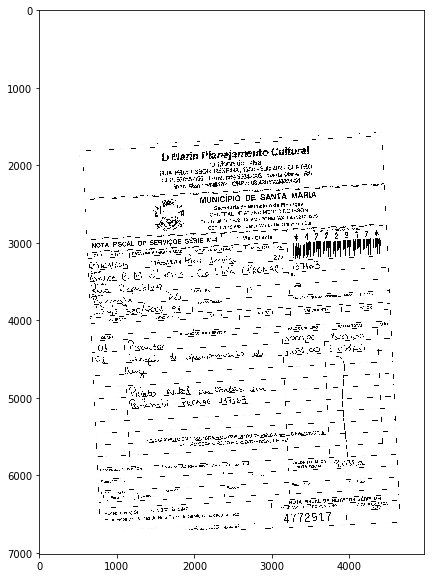

<Figure size 432x288 with 0 Axes>

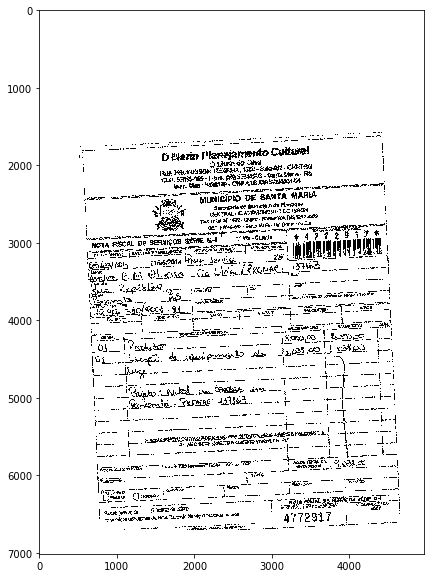

Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/002.jpg


<Figure size 432x288 with 0 Axes>

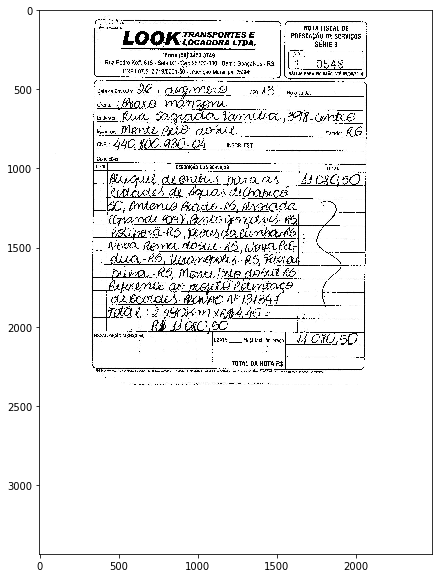

<Figure size 432x288 with 0 Axes>

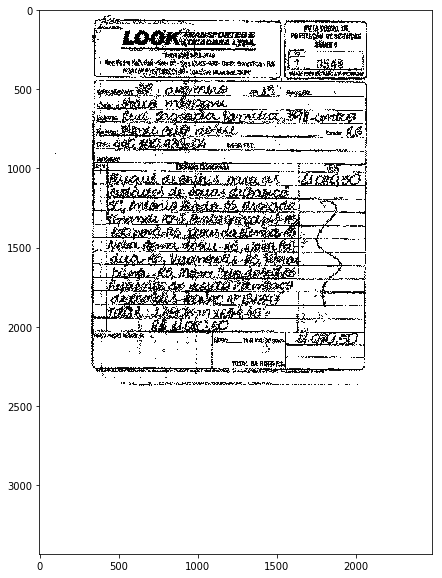

Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/0036 correios.jpg


<Figure size 432x288 with 0 Axes>

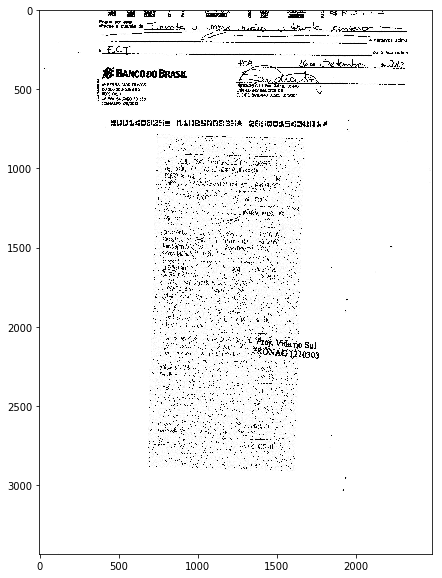

<Figure size 432x288 with 0 Axes>

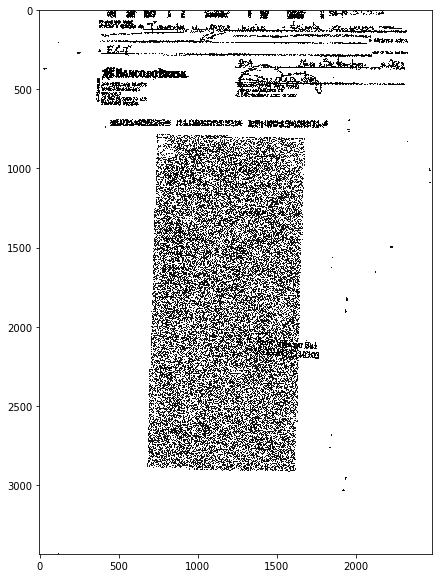

Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/02_17fevereiro_almocoCampoLimpo.jpg


<Figure size 432x288 with 0 Axes>

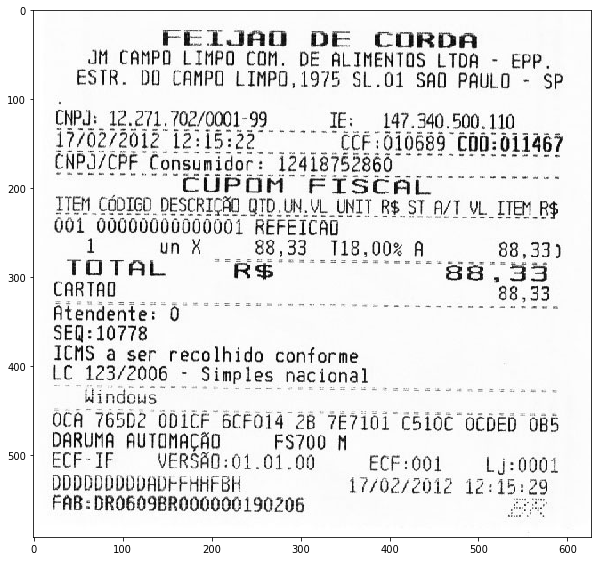

<Figure size 432x288 with 0 Axes>

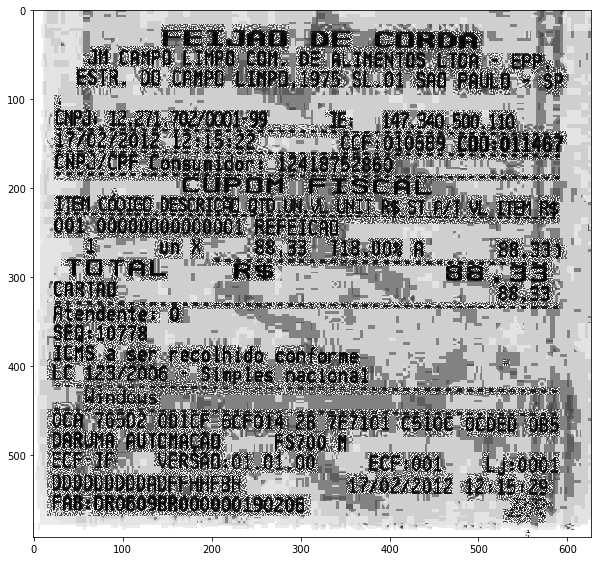

Não foram encontrados CNPJs nesta imagem.

Foram encontrados CNPJs em 0 imagens.



In [9]:
imagesPath = getImages(3) + [DATASET_PATH+'02_17fevereiro_almocoCampoLimpo.jpg']
quantity_cnpj = 0

for path in imagesPath:
    print("-"*80)
    # Imagem 
    print("Imagem: {}".format(path))

    image = cv2.imread(path, 0)
    
    plt.gray()
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()
    
    # Equalizando a imagem
    equalizedImage = cv2.equalizeHist(image)
    
    plt.gray()
    plt.figure(figsize=(10,10))
    plt.imshow(equalizedImage)
    plt.show()
    
    # Extraindo CNPJs dessa imagem.
    CNPJs = extractCNPJ(equalizedImage)

    # Verificando extração.
    if CNPJs:
        print("Foram encontrados: {} CNPJs".format(len(CNPJs)))
        print(CNPJs)
        quantity_cnpj += 1
    else:
        print("Não foram encontrados CNPJs nesta imagem.")
print('='*80)    
print("\nForam encontrados CNPJs em {} imagens.\n".format(quantity_cnpj))

* Teste: Invertendo a intensidade dos pixels
* Resultado: Equalização tornou os textos das imagens irreconhecíveis até mesmo a olho nú.

--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/001.jpg


<Figure size 432x288 with 0 Axes>

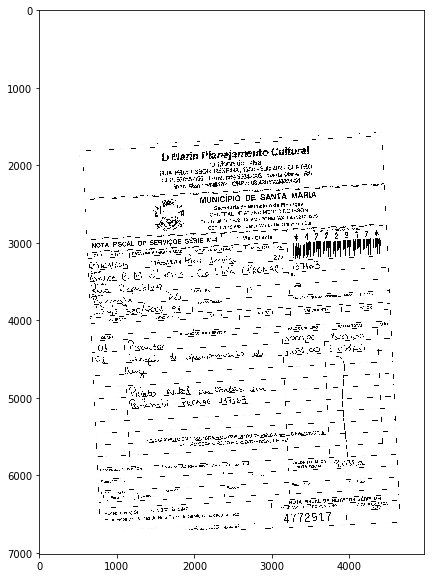

<Figure size 432x288 with 0 Axes>

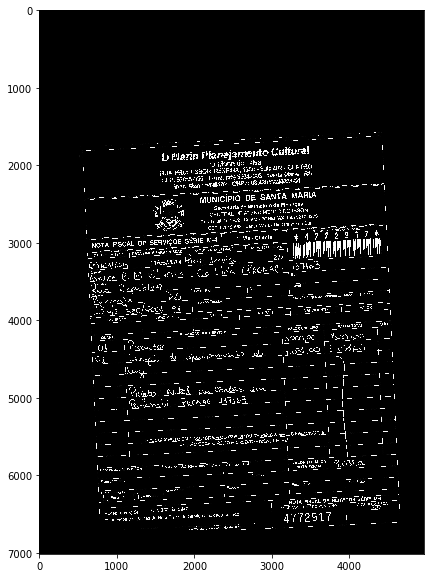

<Figure size 432x288 with 0 Axes>

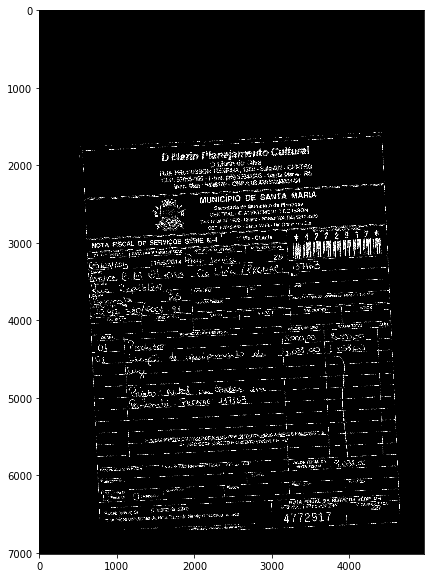

Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/002.jpg


<Figure size 432x288 with 0 Axes>

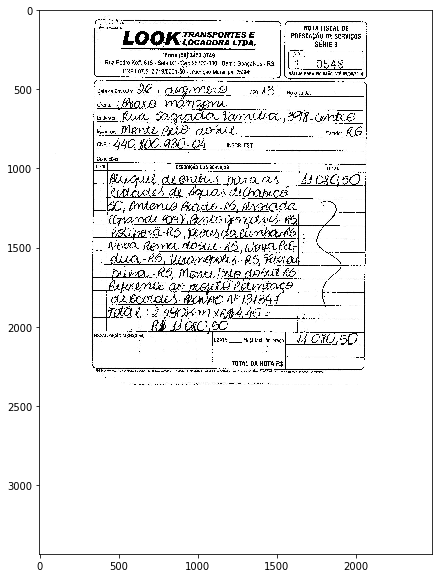

<Figure size 432x288 with 0 Axes>

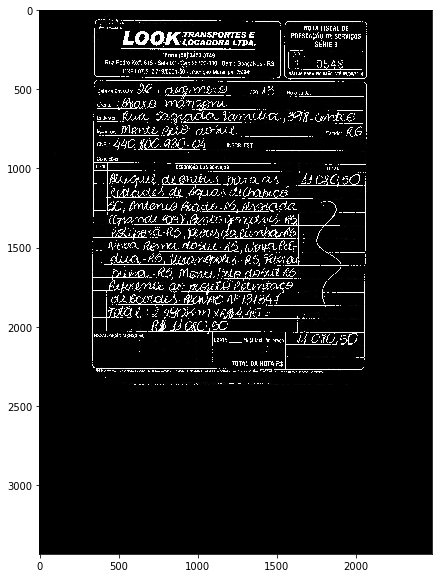

<Figure size 432x288 with 0 Axes>

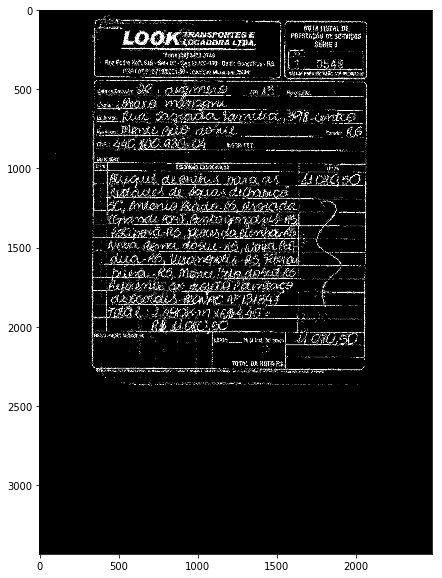

Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/0036 correios.jpg


<Figure size 432x288 with 0 Axes>

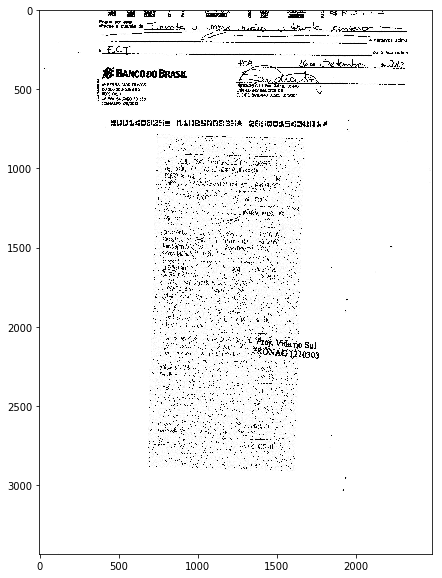

<Figure size 432x288 with 0 Axes>

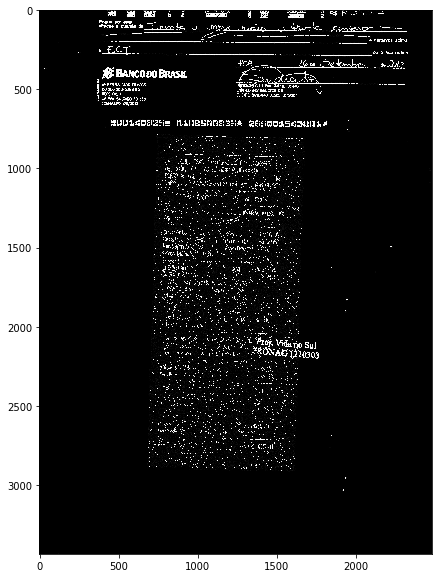

<Figure size 432x288 with 0 Axes>

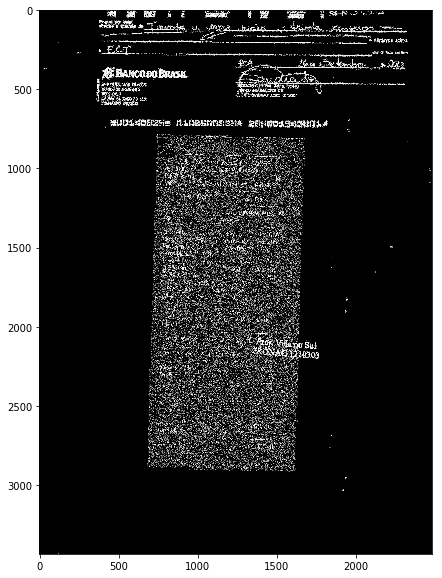

Não foram encontrados CNPJs nesta imagem.
--------------------------------------------------------------------------------
Imagem: /work/notasfiscais/02_17fevereiro_almocoCampoLimpo.jpg


<Figure size 432x288 with 0 Axes>

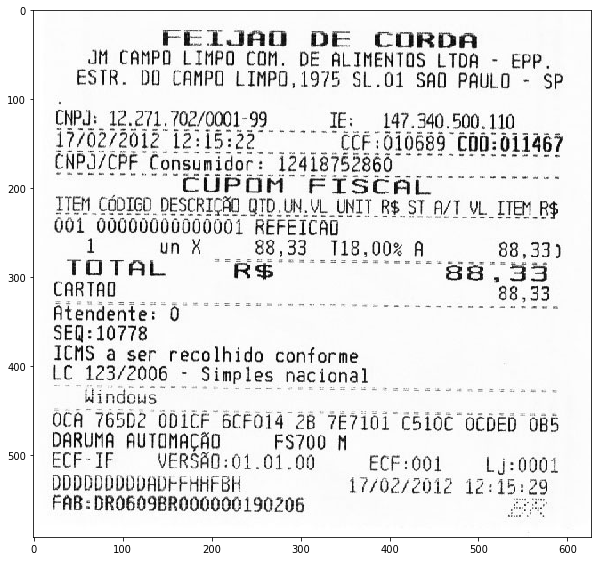

<Figure size 432x288 with 0 Axes>

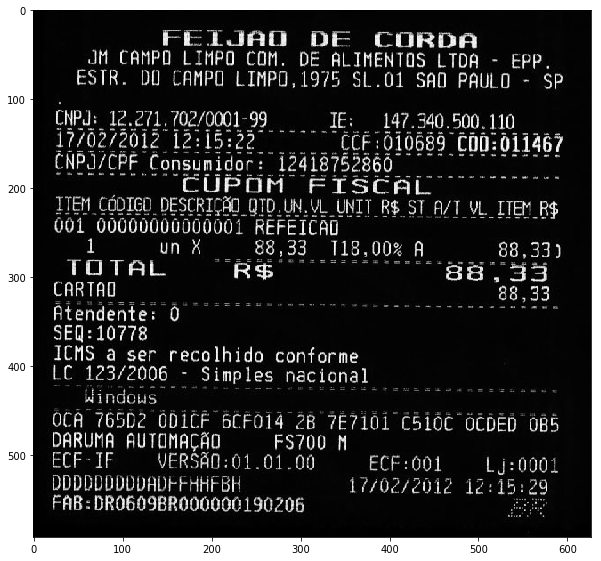

<Figure size 432x288 with 0 Axes>

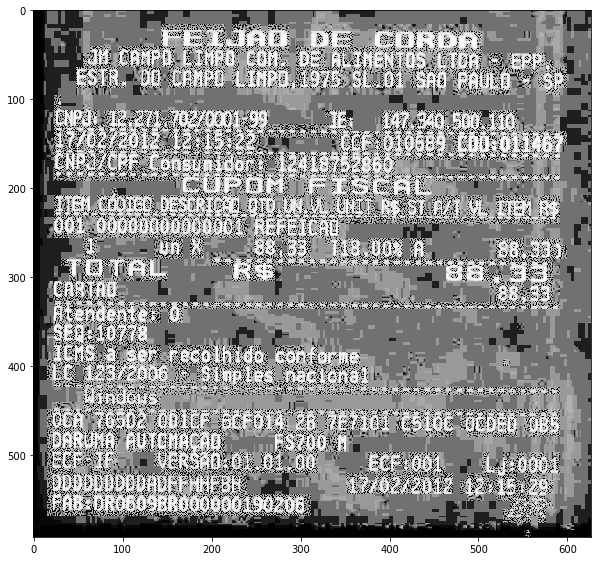

Não foram encontrados CNPJs nesta imagem.

Foram encontrados CNPJs em 0 imagens.



In [10]:
imagesPath = getImages(3) + [DATASET_PATH+'02_17fevereiro_almocoCampoLimpo.jpg']
quantity_cnpj = 0

for path in imagesPath:
    print("-"*80)
    # Imagem 
    print("Imagem: {}".format(path))

    image = cv2.imread(path, 0)
    
    plt.gray()
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()
    
    
    invImage = cv2.bitwise_not(image)
    plt.gray()
    plt.figure(figsize=(10,10))
    plt.imshow(invImage)
    plt.show()
    
    # Equalizando a imagem
    equalizedImage = cv2.equalizeHist(invImage)
    
    plt.gray()
    plt.figure(figsize=(10,10))
    plt.imshow(equalizedImage)
    plt.show()
    
    # Extraindo CNPJs dessa imagem.
    CNPJs = extractCNPJ(equalizedImage)

    # Verificando extração.
    if CNPJs:
        print("Foram encontrados: {} CNPJs".format(len(CNPJs)))
        print(CNPJs)
        quantity_cnpj += 1
    else:
        print("Não foram encontrados CNPJs nesta imagem.")
print('='*80)    
print("\nForam encontrados CNPJs em {} imagens.\n".format(quantity_cnpj))

In [11]:
!tesseract --version

tesseract 4.0.0-241-ga6da6
 leptonica-1.76.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found SSE
